In [ ]:
#Assignment-6

Problem Statement1: Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna() function
2. Encode the 'diagnosis' column using the LabelEncoder()
3. Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Build a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies
6. Calculate and plot the confusion matrix

In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

cancer_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Breast_Cancer_Dataset.csv")
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
cancer_df_filtered = cancer_df.dropna(axis=1,how='all')
cancer_df_filtered

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
cancer_df_filtered.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
#Encode the 'diagnosis' column using the LabelEncoder()

cancer_df_filtered['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cancer_df_filtered['diagnosis'] = label_encoder.fit_transform(cancer_df_filtered['diagnosis'])
cancer_df_filtered

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
cancer_df_filtered['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [16]:
#Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors

X = cancer_df_filtered.drop('diagnosis',axis=1)
Y = cancer_df_filtered['diagnosis']

In [18]:
print("Shape of X:",X.shape)
print("Shape of Y:",Y.shape)

Shape of X: (569, 31)
Shape of Y: (569,)


In [19]:
#Split the dataset into the training set and test set in a 70:30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=21)

print("Shape of X_train is : ",X_train.shape)
print("Shape of X_test is : ",X_test.shape)
print("Shape of Y_train is : ",Y_train.shape)
print("Shape of Y_test is : ",Y_test.shape)

Shape of X_train is :  (398, 31)
Shape of X_test is :  (171, 31)
Shape of Y_train is :  (398,)
Shape of Y_test is :  (171,)


In [22]:
#Build a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models. Also print their accuracies.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
#Logistic Regression

logreg_model = LogisticRegression()

logreg_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = logreg_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the logistic regression model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))


The accuracy score of the logistic regression model on the test data = 
0.6257309941520468


In [24]:
#Naive Bayes

gnb_model = GaussianNB()

gnb_model.fit(X_train, Y_train)

#Predict the output
Y_pred_test = gnb_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the naive bayes model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

The accuracy score of the naive bayes model on the test data = 
0.6257309941520468


In [25]:
#Decision Tree

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = dt_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the decision tree model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

The accuracy score of the decision tree model on the test data = 
0.9064327485380117


In [39]:
#K-Nearest Neigbour(KNN)

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = knn_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the KNN model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

The accuracy score of the KNN model on the test data = 
0.783625730994152


In [40]:
#Support Vector Machine(SVM)

svm_model = SVC()

svm_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = svm_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the SVM model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

The accuracy score of the SVM model on the test data = 
0.6257309941520468


In [59]:
#RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100)

rfc_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test = rfc_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the Random Forest Classifier ensemble model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test))

The accuracy score of the Random Forest Classifier ensemble model on the test data = 
0.9649122807017544


In [62]:
#Calculate and plot the confusion matrix

from sklearn.metrics import confusion_matrix
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train,Y_train)
Y_pred_test = rfc_model.predict(X_test)

   
cm = confusion_matrix(Y_test,Y_pred_test)
cm

array([[104,   3],
       [  5,  59]], dtype=int64)

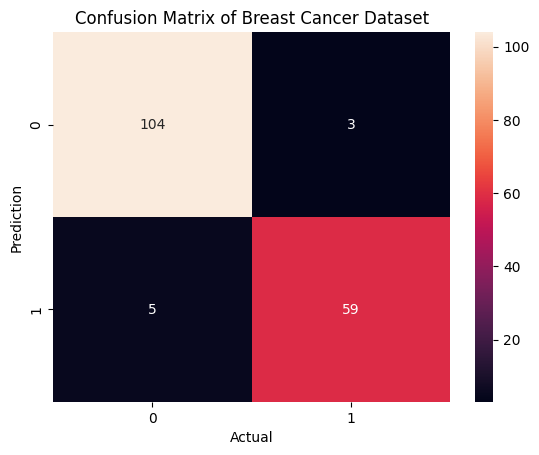

In [65]:
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title('Confusion Matrix of Breast Cancer Dataset')
plt.show()


Problem Statement2: Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna() function
2. Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()
3. Separate the target variable and the feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies
6. Calculate the  ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)
7. Plot the ROC Curve using the Matplotlib library
8. Calculate the F1 Score
9. Calculate and Print the Precision, Recall, and F1 score using the classification_report() function

Hint: You can declare the algorithms in a list and iterate through them to build their respective models and calculate their accuracies using a for loop.

In [66]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

cancer_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Breast_Cancer_Dataset.csv")
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [69]:
cancer_df_filtered = cancer_df.dropna(axis=1,how='all')
cancer_df_filtered

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [70]:
#Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cancer_df_filtered['diagnosis'] = label_encoder.fit_transform(cancer_df_filtered['diagnosis'])
cancer_df_filtered

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [71]:
#Separate the target variable and the feature vectors

X = cancer_df_filtered.drop('diagnosis',axis=1)
Y = cancer_df_filtered['diagnosis']

In [72]:
#Split the dataset into the training set and test set in a 70:30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=21)

print("Shape of X_train is : ",X_train.shape)
print("Shape of X_test is : ",X_test.shape)
print("Shape of Y_train is : ",Y_train.shape)
print("Shape of Y_test is : ",Y_test.shape)

Shape of X_train is :  (398, 31)
Shape of X_test is :  (171, 31)
Shape of Y_train is :  (398,)
Shape of Y_test is :  (171,)


In [76]:
#Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies
#Hint: You can declare the algorithms in a list and iterate through them to build their respective models and calculate their accuracies using a for loop

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Pass the models in a list
model_list = [LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in model_list:
    model.fit(X_train,Y_train)

    #Predict the output
    Y_pred_test = model.predict(X_test)

    #Evaluate the model
    print("The accuracy score of the",str(model),"model on the test data = ")
    print(accuracy_score(Y_test,Y_pred_test))
    print("=========================================================================================")
    print("The classification report of the",model,"model on the test data = ")
    print(classification_report(Y_test,Y_pred_test))


The accuracy score of the LogisticRegression() model on the test data = 
0.6257309941520468
The classification report of the LogisticRegression() model on the test data = 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171

The accuracy score of the GaussianNB() model on the test data = 
0.6257309941520468
The classification report of the GaussianNB() model on the test data = 
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       107
           1       0.50      0.02      0.03        64

    accuracy                           0.63       171
   macro avg       0.56      0.50      0.40       171
weighted avg       0.58      0.63      0.49       171

The accuracy score

In [81]:
#Calculate the  ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)

from sklearn.metrics import roc_curve, roc_auc_score

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,Y_train)

# Get predicted class probabilities for the test set 
Y_pred_prob = rfc_model.predict_proba(X_test)[:, 1] 

# Compute the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob, pos_label=1)

# Compute the ROC AUC score 
roc_auc_score = roc_auc_score(Y_test, Y_pred_prob) 
print("ROC AUC Score for RandomForestClassifier model on the test dataset=",roc_auc_score)



ROC AUC Score for RandomForestClassifier model on the test dataset= 0.9924065420560747


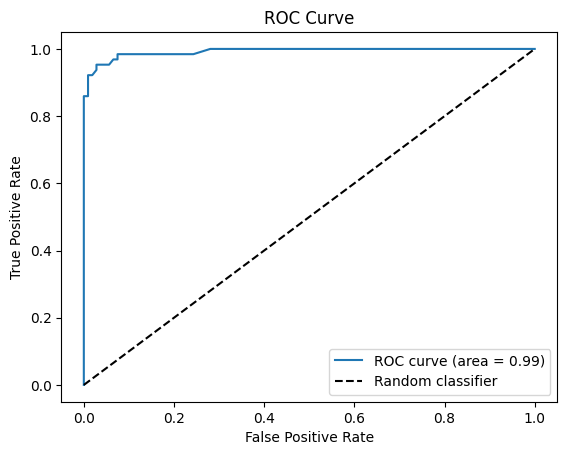

In [82]:
#Plot the ROC Curve using the Matplotlib library

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()


Problem Statement3: Load the ‘voice.csv’ dataset into a DataFrame and perform the following tasks:
1. Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’
2. Using the preprocessing() function, label the target column
3. Separate the targetvariable and the feature vectors
4. Build a RandomForestClassifier model and find the best parameters using a Grid search
5. Print the best parameters and the best estimator

In [10]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

voice_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\voice.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [11]:
voice_df.shape

(3168, 21)

In [12]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [13]:
voice_df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
#Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’

voice_df.rename(columns={'label':'Gender_Identified'},inplace=True)
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [15]:
voice_df['Gender_Identified'].value_counts()

Gender_Identified
male      1584
female    1584
Name: count, dtype: int64

In [16]:
#Using the preprocessing() function, label the target column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
voice_df['Gender_Identified'] = label_encoder.fit_transform(voice_df['Gender_Identified'])
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [17]:
voice_df['Gender_Identified'].value_counts()

Gender_Identified
1    1584
0    1584
Name: count, dtype: int64

In [18]:
#Separate the targetvariable and the feature vectors

X = voice_df.drop('Gender_Identified',axis=1)
Y = voice_df['Gender_Identified']

print("Shape of X:",X.shape)
print("Shape of Y:",Y.shape)

Shape of X: (3168, 20)
Shape of Y: (3168,)


In [21]:
#Split train and test datasets

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)



Shape of X_train: (2534, 20)
Shape of Y_train: (2534,)
Shape of X_test: (634, 20)
Shape of Y_test: (634,)


In [25]:
#Build a RandomForestClassifier model
#First, we will train the model with default Random Forest Classifier Hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

rfc = RandomForestClassifier() 
rfc.fit(X_train,Y_train) 

# predict the model 
Y_pred_test = rfc.predict(X_test) 

# performance evaluation metrics 
print("Accuracy Score for default Random Forest Classifier Hyperparameters:")
print(accuracy_score(Y_pred_test, Y_test))
print("==================================================================")
print("Classification Report for default Random Forest Classifier Hyperparameters:")
print(classification_report(Y_pred_test, Y_test))


Accuracy Score for default Random Forest Classifier Hyperparameters:
0.9794952681388013
Classification Report for default Random Forest Classifier Hyperparameters:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           1       0.97      0.99      0.98       308

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [31]:
#Find the best parameters using a Grid search

param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['auto', 'sqrt', 'log2']
} 

grid_search = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring='accuracy') 
grid_search.fit(X_train,Y_train) 

print("The best parameters are:",grid_search.best_params_)
print("The best estimator is:",grid_search.best_estimator_)



The best parameters are: {'max_features': 'log2', 'n_estimators': 50}
The best estimator is: RandomForestClassifier(max_features='log2', n_estimators=50)


In [34]:
#Applying the best hyperparameters and fitting the model again on train dataset

rfc_best = RandomForestClassifier(max_features='log2', n_estimators=50) 
rfc_best.fit(X_train,Y_train) 

# predict the model 
Y_pred_test2 = rfc_best.predict(X_test) 

# performance evaluation metrics 
print("Accuracy Score for the best Random Forest Classifier Hyperparameters:")
print(accuracy_score(Y_pred_test2, Y_test))
print("==================================================================")
print("Classification Report for the best Random Forest Classifier Hyperparameters:")
print(classification_report(Y_pred_test2, Y_test))

Accuracy Score for the best Random Forest Classifier Hyperparameters:
0.9810725552050473
Classification Report for the best Random Forest Classifier Hyperparameters:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       325
           1       0.97      0.99      0.98       309

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Problem Statement4: The ‘seeds.csv’ dataset contains the data about the wheat seeds, the ‘Type’ column consisit of three unique values, 1, 2, 3,which are classified based on the charecterstics of seeds entailing in other columns.

Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks: 
1. Considering the 'Type' column as target, analyze  the target column by printing the uniquevalues
2. Separate the feature vectors and the target variable
3. Split the dataset into train and test sets in a 70:30 ratio
4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA Boost Classifier and compare the accuracy scores with original models using a bar plot

In [35]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

seed_df = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\seeds.csv")
seed_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [36]:
seed_df.shape

(199, 8)

In [37]:
seed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [38]:
seed_df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [40]:
seed_df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [41]:
seed_df['Type'].value_counts()

Type
2    68
1    66
3    65
Name: count, dtype: int64

In [42]:
#Separate the feature vectors and the target variable

X = seed_df.drop('Type',axis=1)
Y = seed_df['Type']

print("Shape of X:",X.shape)
print("Shape of Y:",Y.shape)

Shape of X: (199, 7)
Shape of Y: (199,)


In [43]:
#Split the dataset into train and test sets in a 70:30 ratio

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=21)

print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (139, 7)
Shape of Y_train: (139,)
Shape of X_test: (60, 7)
Shape of Y_test: (60,)


In [55]:
#Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

#Predict the output
Y_pred_test_dt = dt_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the decision tree model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test_dt))


#Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

#Predict the output
Y_pred_test_nb = gnb_model.predict(X_test)

#Evaluate the model
print("The accuracy score of the naive bayes model on the test data = ")
print(accuracy_score(Y_test,Y_pred_test_nb))

The accuracy score of the decision tree model on the test data = 
0.9333333333333333
The accuracy score of the naive bayes model on the test data = 
0.9


In [62]:
#For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA Boost Classifier 

from sklearn.ensemble import AdaBoostClassifier

#Boost accuracy of Decision Tree model using AdaBoost
abc_dt = AdaBoostClassifier(n_estimators=80, base_estimator=dt_model,random_state=1)
abc_dt.fit(X_train,Y_train)
Y_pred_test_abc_dt = abc_dt.predict(X_test)

print("The accuracy score of the AdaBoost on Decision Tree model = ")
print(accuracy_score(Y_test,Y_pred_test_abc_dt))

#Boost accuracy of Naive Bayes model using AdaBoost
abc_nb = AdaBoostClassifier(n_estimators=80, base_estimator=gnb_model,random_state=1)
abc_nb.fit(X_train,Y_train)
Y_pred_test_abc_nb = abc_nb.predict(X_test)

print("The accuracy score of the AdaBoost on Naive Bayes model = ")
print(accuracy_score(Y_test,Y_pred_test_abc_nb))

The accuracy score of the AdaBoost on Decision Tree model = 
0.95
The accuracy score of the AdaBoost on Naive Bayes model = 
0.9666666666666667


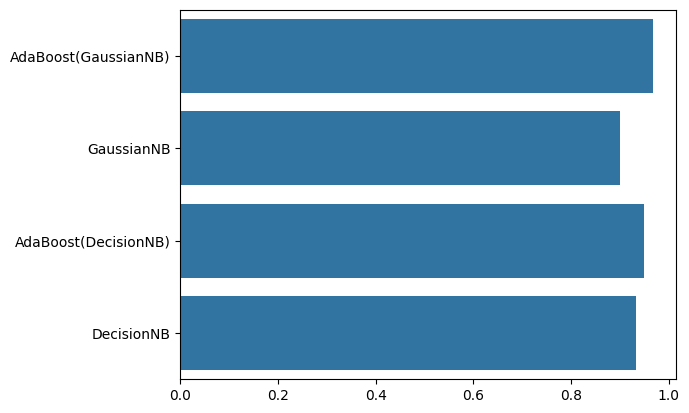

In [64]:
#Compare the accuracy scores with original models using a bar plot

ac_abc_nb = accuracy_score(Y_test,Y_pred_test_abc_nb)
ac_abc_dt = accuracy_score(Y_test,Y_pred_test_abc_dt)
ac_nb = accuracy_score(Y_test,Y_pred_test_nb)
ac_dt = accuracy_score(Y_test,Y_pred_test_dt)

sns.barplot(y=["AdaBoost(GaussianNB)","GaussianNB","AdaBoost(DecisionNB)","DecisionNB"], x=[ac_abc_nb,ac_nb,ac_abc_dt,ac_dt])
plt.show()